In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze5-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()


This is how maze looks like
<class 'tuple'>
('0', '1', '0', '0', '1', '0', '1', '0')

■ ■ ■ ■ ■ ■ ■ ■ ■
■ □ □ □ □ □ □ $ ■
■ □ □ ■ □ ■ ■ □ ■
■ □ ■ □ □ □ □ □ ■
■ □ □ □ ■ ■ □ □ ■
■ □ ■ □ ■ □ □ ■ ■
■ □ ■ □ □ ■ A □ ■
■ □ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■ ■


In [3]:
from lcs.agents.xcs import XCS
from lcs.agents.xcs import Configuration as XCSConfig
from lcs.agents.xncs import XNCS
from lcs.agents.xncs import Configuration as XNCSConfig

from utils.xcs_utils import xcs_metrics
from utils.nxcs_utils import xncs_maze_metrics

XCScfg = XCSConfig(number_of_actions=8,
                    max_population=7000,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xcs_metrics)

XNCScfg = XNCSConfig(number_of_actions=8,
                    max_population=7000,
                    learning_rate=0.2,
                    alpha=0.1,
                    gamma=0.71,
                    mutation_chance=0.01,
                    delta=0.1,
                    ga_threshold=25,
                    covering_wildcard_chance = 0.7,
                    chi=1,      # crossover
                    metrics_trial_frequency=100,
                    initial_prediction =10,  # p_i
                    initial_error = 0,  # epsilon_i
                    initial_fitness = 10,  # f_i
                    user_metrics_collector_fcn=xncs_maze_metrics,
                    lmc=10,
                    lem=200)


In [4]:
from utils.xcs_utils import avg_experiment as XCSExp
from utils.nxcs_utils import avg_experiment as XNCSExp

number_of_experiments = 1
explore = 5000
exploit = 500

df = XCSExp(maze=maze,
             cfg=XCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=explore,
             exploit_trials=exploit)

df_other = XNCSExp(maze=maze,
             cfg=XNCScfg,
             number_of_tests=number_of_experiments,
             explore_trials=explore,
             exploit_trials=exploit)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 100, 'reward': 0.0, 'perf_time': 0.056999599999997486, 'population': 114, 'numerosity': 158, 'average_specificity': 7.537974683544304}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 45, 'reward': 1000.0002159007435, 'perf_time': 1.8200448999999708, 'population': 2024, 'numerosity': 7000, 'average_specificity': 33.195}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 83, 'reward': 1000.0000000005091, 'perf_time': 5.506315299999869, 'population': 2214, 'numerosity': 7000, 'average_specificity': 42.60185714285714}
INFO:lcs.agents.Agent:{'trial': 1500, 'steps_in_trial': 3, 'reward': 1468.2325875702113, 'perf_time': 0.03669999999988249, 'population': 2130, 'numerosity': 7000, 'average_specificity': 36.26385714285714}
INFO:lcs.agents.Agent:{'trial': 2000, 'steps_in_trial': 12, 'reward': 1016.4112642639607, 'perf_time': 0.4223326999999699, 'population': 2125, 'numerosity': 7000, 'average_specificity': 52.344857142857144}
INFO:lcs.agents.Agent:{'trial': 2500, 'steps_in_trial': 16, 'reward': 1004.1911926445374, 'perf_time': 0.4556173000000854, 'population': 1794, 'numerosity': 7000, 'average_specificity': 48.983

Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 100, 'reward': 2.385089144282033e-42, 'perf_time': 0.3215463999995336, 'numerosity': 7000, 'population': 299, 'average_specificity': 237.998, 'fraction_accuracy': 1.0, 'knowledge': 0.684931506849315}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 100, 'reward': 1.3360874108190892e-12, 'perf_time': 0.19002030000046943, 'numerosity': 7000, 'population': 180, 'average_specificity': 246.41742857142856, 'fraction_accuracy': 1.0, 'knowledge': 0.0}
INFO:lcs.agents.Agent:{'trial': 1500, 'steps_in_trial': 100, 'reward': 3.186687579353646e-57, 'perf_time': 0.18601009999929374, 'numerosity': 7000, 'population': 173, 'average_specificity': 246.51342857142856, 'fraction_accuracy': 1.0, 'knowledge': 0.0}
INFO:lcs.agents.Agent:{'trial': 2000, 'steps_in_trial': 51, 'reward': 1000.0, 'perf_time': 0.10225990000071761, 'numerosity': 7000, 'population': 168, 'average_specificity': 245.83, 'fraction_accuracy': 1.0, 'knowledge': 0.0}
INFO:lcs.a

In [5]:
df['steps_in_trial_other']=df_other['steps_in_trial']
df['population_other']=df_other['population']
df['numerosity_other']=df_other['numerosity']
df['average_specificity_other']=df_other['average_specificity']
df['fraction_accuracy_other']=df_other['fraction_accuracy']

display(df)

,steps_in_trial,reward,perf_time,population,numerosity,average_specificity,steps_in_trial_other,population_other,numerosity_other,average_specificity_other,fraction_accuracy_other
trial,,,,,,,,,,,
0,100,0.000000e+00,0.057000,114,158,7.537975,100,150,201,8.656716,0.99
100,26,1.000184e+03,0.548220,1148,7000,22.267143,10,1855,6192,43.644703,1.00
200,7,1.107361e+03,0.122769,1464,7000,19.244714,14,2059,7000,104.774286,1.00
300,38,1.000002e+03,1.614283,1713,7000,27.438143,100,937,7000,193.871000,1.00
400,10,1.033091e+03,0.415734,1909,7000,24.739571,100,439,7000,228.319286,1.00
500,45,1.000000e+03,1.820045,2024,7000,33.195000,100,299,7000,237.998000,1.00
600,25,1.000209e+03,2.665137,2100,7000,38.710000,94,224,7000,241.446571,1.00
700,100,1.338896e-12,6.220731,2208,7000,44.138143,93,195,7000,243.890000,1.00
800,10,1.036617e+03,0.279807,2174,7000,38.678714,40,181,7000,245.906000,1.00


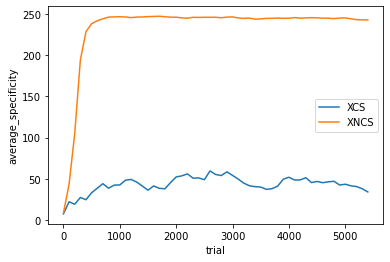

In [6]:
import pandas as pd
import numpy as np

ax = df[['average_specificity', "average_specificity_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["XCS","XNCS"])



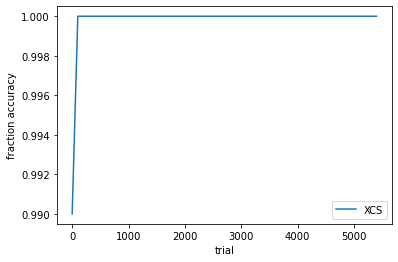

In [7]:
ax = df["fraction_accuracy_other"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["XCS","XNCS"])

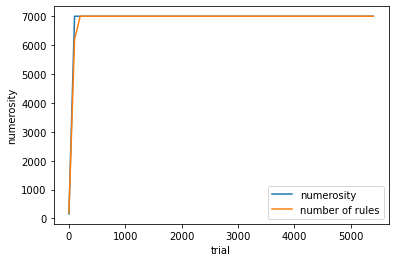

In [8]:
ax = df[['numerosity', 'numerosity_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("numerosity")
ax.legend(["numerosity", "number of rules"])

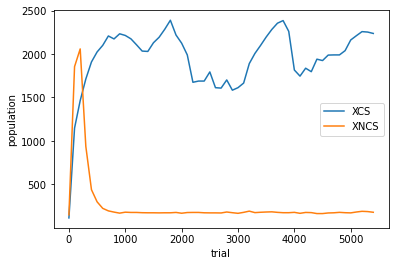

In [9]:
ax = df[['population', "population_other"]].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["XCS","XNCS"])

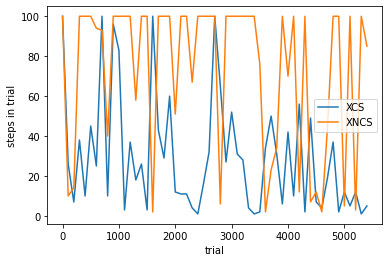

In [10]:
ax = df[['steps_in_trial', 'steps_in_trial_other']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["XCS","XNCS"])